In [1]:
import numpy as np
import pandas as pd
import seaborn as sea 
import matplotlib.pyplot as plt

In [2]:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
sea.set_style("whitegrid")
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
import os
import time
import copy
import pickle
import random
import shutil

import torch

import meth_model_utils as u
import meth_model_classes as c

In [6]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [7]:
os.environ["CUBLAS_WORKSPACE_CONFIG"]=":16:8"

In [8]:
def get_seed():
    return 324

In [9]:
# https://pytorch.org/docs/stable/notes/randomness.html
seed = get_seed()
print('Seed = ', seed)
u.set_all_seeds(seed)

Seed =  324


In [10]:
PATH = "D:/CANCER BIOLOGY/DATASET/TCGA/FROM Xena/"

In [11]:
df_luad = pd.read_csv(PATH+"meth_luad.csv", index_col=0)
df_lusu = pd.read_csv(PATH+"meth_lusu.csv", index_col=0)
df_lusu.drop(index=['MBD3L2'], axis=0, inplace=True)
df_final = u.meth_data_preprocess(df_luad, df_lusu)

In [12]:
df_final = df_final.sample(frac=1, random_state=seed).reset_index(drop=True)
labels = list(df_final['label'])
df_final.drop(columns=['label'], axis=1, inplace=True) ## drop column sample_id and label
columns = list(df_final.columns)

In [13]:
xtrain = df_final.to_numpy()
ytrain = labels

---
---
---

## Evaluate Biomarkers

In [14]:
# MLPClassifier(hidden_layer_sizes=(512, 256, 128), random_state=seed, batch_size=batch_size_df, verbose=False, learning_rate_init=learning_rate, max_iter=epochs, alpha=0.02),  ## predict_proba
#         LogisticRegression(random_state=seed, max_iter=epochs, penalty='elasticnet', l1_ratio=0.04, solver='saga'),  ## predict_proba
#         XGBClassifier(eta=0.1, max_depth=10, alpha=0.5, random_state=seed, verbosity=0),
#         SVC(kernel='rbf', random_state=seed), ## decision_func
#     ]

    

In [15]:
genee = u.read_essential_genes(PATH)

In [16]:
genee

['C18orf18', 'CCDC15', 'CCNT2', 'EXOC6', 'SNORA9', 'THOP1', 'TNPO2']

In [17]:
df_final_select = df_final[df_final.columns.intersection(genee)]
xtrain = df_final_select

In [18]:
xtrain

,THOP1,EXOC6,CCNT2,CCDC15,TNPO2,SNORA9,C18orf18
0,-0.4780,-0.3913,-0.4703,-0.4642,-0.4764,-0.4451,-0.4693
1,-0.4867,-0.3991,-0.4768,-0.4916,-0.4733,-0.4598,-0.4650
2,-0.4466,-0.3800,-0.4772,-0.4596,-0.4776,-0.4648,-0.4766
3,-0.4757,-0.3949,-0.4655,-0.4857,-0.4748,-0.4519,-0.4481
4,-0.4910,-0.4150,-0.4785,-0.4929,-0.4871,-0.4671,-0.4762
...,...,...,...,...,...,...,...
823,-0.4791,-0.3795,-0.4622,-0.4397,-0.4679,-0.4400,-0.4459
824,-0.4680,-0.4867,-0.4521,0.2519,-0.4443,-0.4426,-0.4601
825,-0.4746,-0.4839,-0.4682,0.3519,-0.4675,-0.4141,-0.4660
826,-0.4796,-0.4700,-0.4641,0.0926,-0.4524,-0.4258,-0.4638


In [19]:
# ## https://aneesha.medium.com/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
# ## https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee


# '''
# grid search done with following params
# final param selected :
# alpha 0.5
# batch 32
# layers (128, 64)
# lr 5.00E-05
# epochs 20
# seed 324
# optim adam

# '''


# xtrain = df_final_select.to_numpy()
# ytrain = labels
# print("\n===============================================================================")
# print("============================== MLP ==============================")
# print("===============================================================================")
# folds = 10
# params = {
#     'solver':['adam'],
#     'hidden_layer_sizes':[(64, 32), (64, 64), (49, 14), (128, 64)],
#     'batch_size':[8, 16, 32],
#     'verbose':[False],
#     'random_state':[seed],
#     'learning_rate_init':[1e-5, 5e-5, 1e-6, 5e-6],
#     'max_iter':[20, 25, 30, 35],
#     'alpha':[0.2, 0.5, 1, 10]
# }
# grid_search_svc = GridSearchCV(
#     MLPClassifier(),
#     param_grid=params,
#     cv=folds,
# )
# grid_search_svc.fit(xtrain, ytrain)
# # print(grid_search_svc.best_params_)
# # print(grid_search_svc.best_score_)
# df = pd.DataFrame(grid_search_svc.cv_results_)
# df
# # df.to_csv(path_to_save_grid_results+'/svc/using_top_50_'+xai+'_'+feat+'.csv')

        

In [20]:
# ## https://aneesha.medium.com/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
# ## https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee


# '''
# grid search done with following params
# final param selected :
# alpha 0.5
# batch 32
# layers (128, 64)
# lr 5.00E-05
# epochs 20
# seed 324
# optim adam

# '''


# xtrain = df_final_select.to_numpy()
# ytrain = labels
# print("\n===============================================================================")
# print("============================== MLP ==============================")
# print("===============================================================================")
# folds = 10
# scoring = {"AUC": "roc_auc", "F1":'f1', "Accuracy": "accuracy", "Balanced Acc":"balanced_accuracy"}
# params = {
#     'solver':['adam'],
#     'hidden_layer_sizes':[(128, 64)],
#     'batch_size':[32],
#     'verbose':[False],
#     'random_state':[seed],
#     'learning_rate_init':[5e-6],
#     'max_iter':[30],
#     'alpha':[1]
# }
# grid_search_svc = GridSearchCV(
#     MLPClassifier(),
#     param_grid=params,
#     scoring=scoring,
#     refit='Balanced Acc',
#     cv=folds,
# )
# grid_search_svc.fit(xtrain, ytrain)
# # print(grid_search_svc.best_params_)
# # print(grid_search_svc.best_score_)
# df = pd.DataFrame(grid_search_svc.cv_results_)
# df
# # df.to_csv(path_to_save_grid_results+'/svc/using_top_50_'+xai+'_'+feat+'.csv')

        

In [21]:
'''
this is the new path created for evaluating statistical significance
'''
new_path = PATH+'project_summary_seed_wise_meth/for statistical significant/'

In [22]:
seeds = [227,
251,
264,
272,
297,
316,
344,
357,
361,
374,
375,
424,
448,
468,
469,
553,
575,
586,
592,
703,
706,
718,
743,
826,
858,
944,
949,
990,
976,
978]
for seed in seeds:
    xtrain = df_final_select.to_numpy()
    ytrain = labels
    print("\n===============================================================================")
    print("============================== MLP ==============================")
    print("===============================================================================")
    folds = 10
    # scoring = {"Accuracy": "accuracy"}
    params = {
        'solver':['adam'],
        'hidden_layer_sizes':[(128, 64)],
        'batch_size':[70],
        'verbose':[False],
        'random_state':[seed],
        'learning_rate_init':[5e-5],
        'max_iter':[30],
        'alpha':[0.0005]
    }
    grid_search_svc = GridSearchCV(
        MLPClassifier(),
        param_grid=params,
    #     scoring=scoring,
    #     refit=True,
        cv=folds,
    )
    grid_search_svc.fit(xtrain, ytrain)
    # print(grid_search_svc.best_params_)
    # print(grid_search_svc.best_score_)
    df = pd.DataFrame(grid_search_svc.cv_results_)
    df.to_csv(new_path+'meth_results_7_genes_MLP'+str(seed)+'.csv')
#     print(df)


============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==============================

============================== MLP ==========================

In [23]:
# from sklearn.model_selection import KFold, cross_val_predict
# from sklearn.metrics import confusion_matrix


In [24]:
# kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
# y_pred = cross_val_predict(grid_search_svc.best_estimator_, xtrain, ytrain, cv=10)
# conf_mat = confusion_matrix(ytrain, y_pred)


In [25]:
# conf_mat

In [26]:
# from yellowbrick.classifier import ConfusionMatrix


In [27]:
# cm = ConfusionMatrix(grid_search_svc.best_estimator_, classes=['LUSC','LUAD'])
# # cm.fit(xtrain, ytrain)
# cm.score(xtrain, ytrain)
# cm.show(outpath='conf_mat_meth.pdf')
# # plt.savefig('conf_mat_meth.png', dpi=300, bbox_inches='tight')

In [28]:
# imp

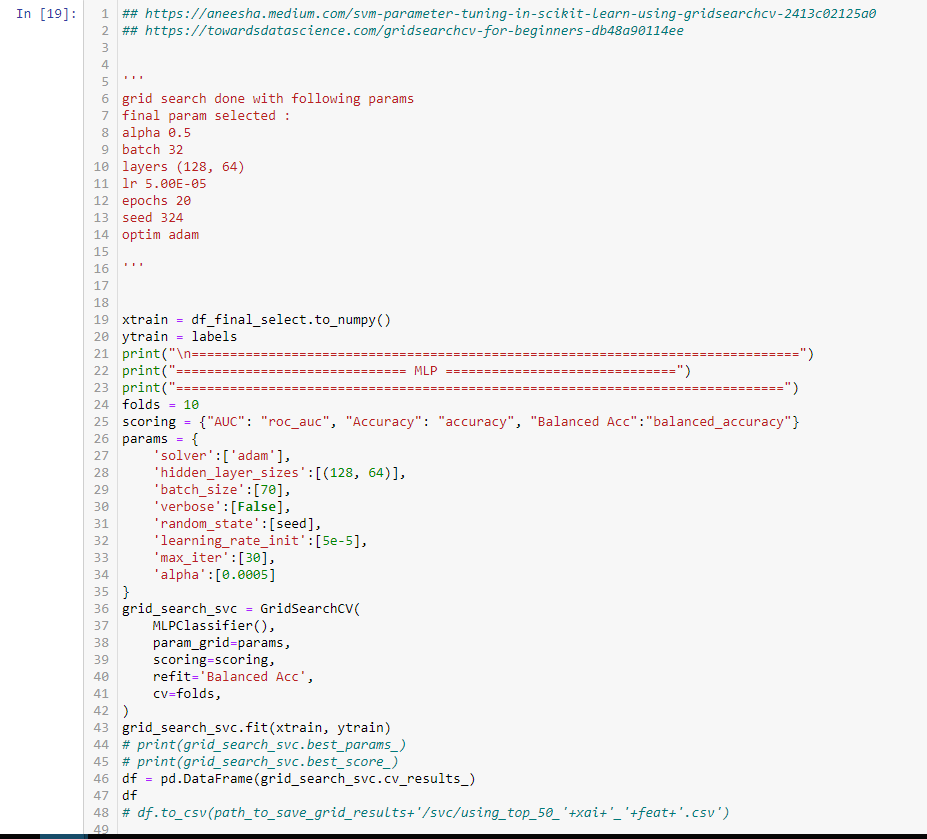

selected model

In [29]:
# df.to_csv(PATH+'project_summary_seed_wise_meth/meth_results_7_genes_FINAL_MLP.csv')

In [30]:
# new_path = PATH+'project_summary_seed_wise_meth/'
seeds = [227,
251,
264,
272,
297,
316,
344,
357,
361,
374,
375,
424,
448,
468,
469,
553,
575,
586,
592,
703,
706,
718,
743,
826,
858,
944,
949,
990,
976,
978]
for seed in seeds:
    xtrain = df_final_select.to_numpy()
    ytrain = labels
    folds = 10
    params = {
        'kernel':['poly'],
        'C':[1],
        'coef0':[4e3, 1e9], #1e9, 4e3
        'degree':[4, 5], #4, 5
        'gamma':[1e4], #1e4
        'tol':[2], #2
        'max_iter':[3], #3
        'random_state':[seed]
    }
    grid_search_svc = GridSearchCV(
        SVC(),
        param_grid=params,
        cv=folds,
    )
    grid_search_svc.fit(xtrain, ytrain)
    print(grid_search_svc.best_params_)
    print(grid_search_svc.best_score_)
    df = pd.DataFrame(grid_search_svc.cv_results_)
    # df.drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_weights', 'param_metric'], inplace=True)
    df.to_csv(new_path+'meth_results_7_genes_SVC'+str(seed)+'.csv')

{'C': 1, 'coef0': 4000.0, 'degree': 4, 'gamma': 10000.0, 'kernel': 'poly', 'max_iter': 3, 'random_state': 227, 'tol': 2}
0.927710843373494
{'C': 1, 'coef0': 4000.0, 'degree': 4, 'gamma': 10000.0, 'kernel': 'poly', 'max_iter': 3, 'random_state': 251, 'tol': 2}
0.927710843373494
{'C': 1, 'coef0': 4000.0, 'degree': 4, 'gamma': 10000.0, 'kernel': 'poly', 'max_iter': 3, 'random_state': 264, 'tol': 2}
0.927710843373494
{'C': 1, 'coef0': 4000.0, 'degree': 4, 'gamma': 10000.0, 'kernel': 'poly', 'max_iter': 3, 'random_state': 272, 'tol': 2}
0.927710843373494
{'C': 1, 'coef0': 4000.0, 'degree': 4, 'gamma': 10000.0, 'kernel': 'poly', 'max_iter': 3, 'random_state': 297, 'tol': 2}
0.927710843373494
{'C': 1, 'coef0': 4000.0, 'degree': 4, 'gamma': 10000.0, 'kernel': 'poly', 'max_iter': 3, 'random_state': 316, 'tol': 2}
0.927710843373494
{'C': 1, 'coef0': 4000.0, 'degree': 4, 'gamma': 10000.0, 'kernel': 'poly', 'max_iter': 3, 'random_state': 344, 'tol': 2}
0.927710843373494
{'C': 1, 'coef0': 4000.0, '

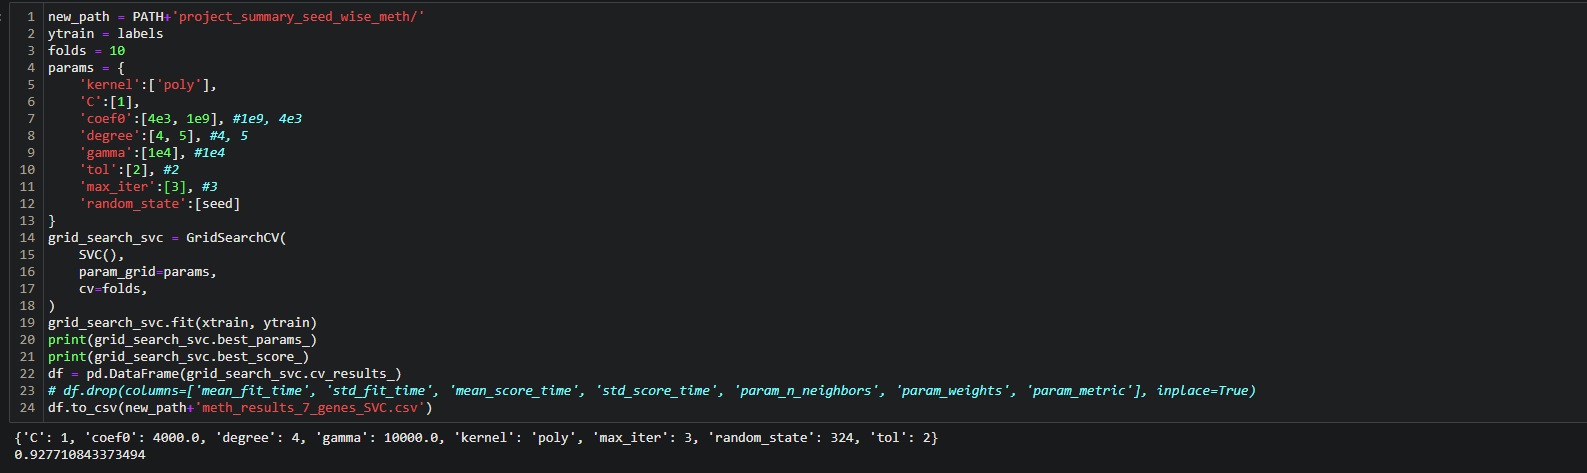

selected SVC model:: rank 3 for the above mentioned grid ():: accuracy: ~85%

In [31]:
# new_path = PATH+'project_summary_seed_wise_meth/'
seeds = [227,
251,
264,
272,
297,
316,
344,
357,
361,
374,
375,
424,
448,
468,
469,
553,
575,
586,
592,
703,
706,
718,
743,
826,
858,
944,
949,
990,
976,
978]
for seed in seeds:
    xtrain = df_final_select.to_numpy()
    ytrain = labels
    folds = 10
    params = {
        'C':[1.05], #1.05
        'penalty':['l2'],
        'solver':['lbfgs'],
        'tol':[100], #100
        'max_iter':[3],
        'random_state':[seed]
    }
    grid_search_lr = GridSearchCV(
        LogisticRegression(),
        param_grid=params,
        cv=folds,
    )
    grid_search_lr.fit(xtrain, ytrain)
#     print(grid_search_lr.best_params_)
#     print(grid_search_lr.best_score_)
    df = pd.DataFrame(grid_search_lr.cv_results_)
    df.to_csv(new_path+'meth_results_7_genes_LR'+str(seed)+'.csv')

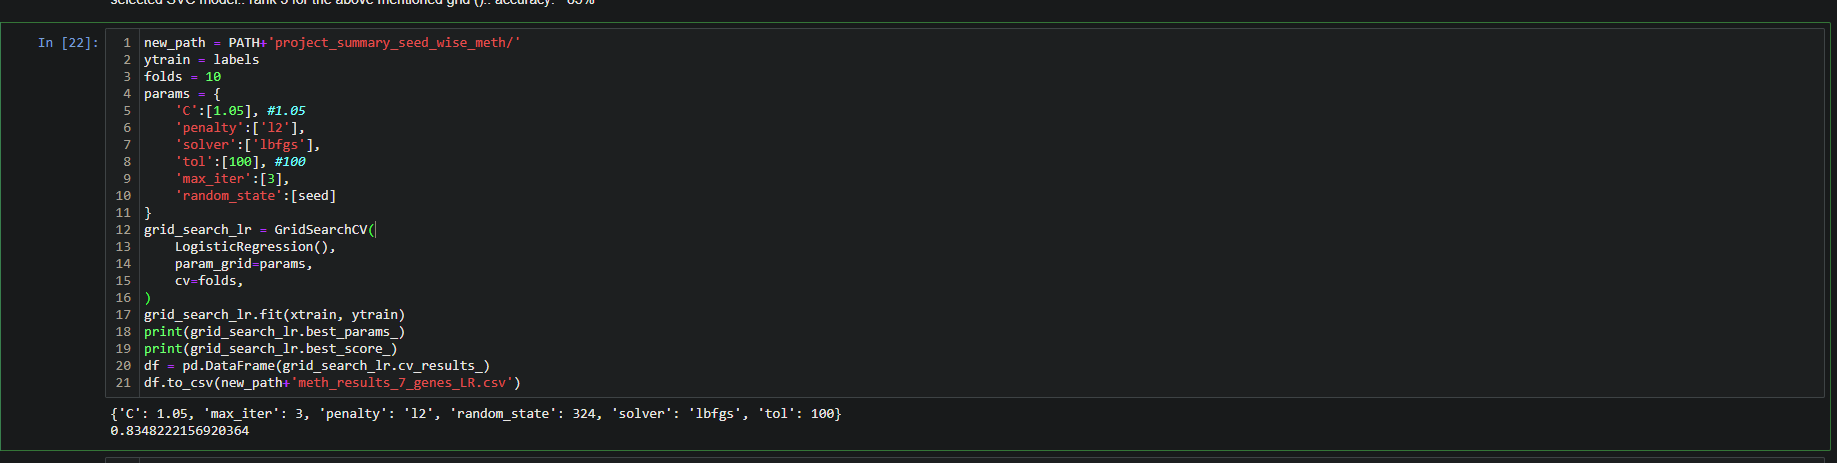

selected model for LR

In [32]:
# new_path = PATH+'project_summary_seed_wise_meth/'
seeds = [227,
251,
264,
272,
297,
316,
344,
357,
361,
374,
375,
424,
448,
468,
469,
553,
575,
586,
592,
703,
706,
718,
743,
826,
858,
944,
949,
990,
976,
978]
for seed in seeds:
    xtrain = df_final_select.to_numpy()
    ytrain = labels
    folds = 10
    params = {
        'n_estimators': [2],
        'max_depth' : [2],
        'criterion' :['gini', 'entropy'],
        'random_state':[seed]
    }
    grid_search_xgb = GridSearchCV(
        RandomForestClassifier(),
        param_grid=params,
        cv=folds,
    )
    grid_search_xgb.fit(xtrain, ytrain)
#     print(grid_search_xgb.best_params_)
#     print(grid_search_xgb.best_score_)
    df = pd.DataFrame(grid_search_xgb.cv_results_)
    df.to_csv(new_path+'meth_results_7_genes_RF'+str(seed)+'.csv')

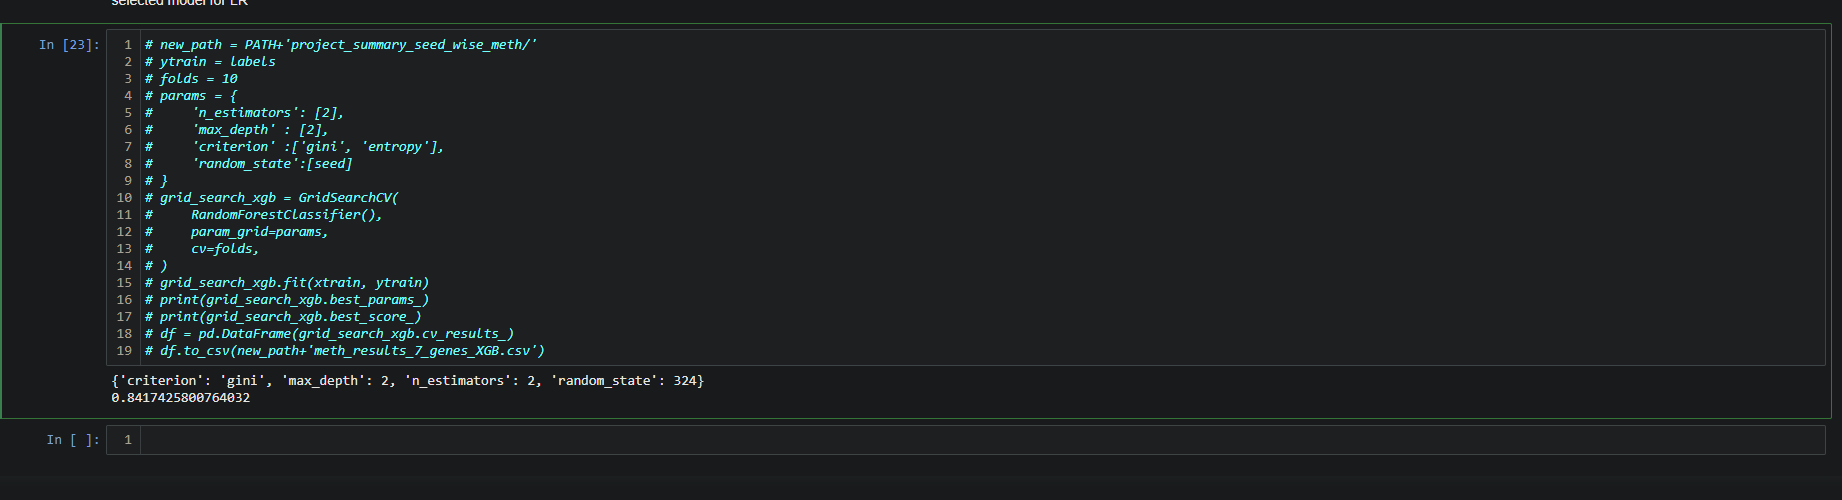

selected random forest model